# Classical Machine Learning examples

In this notebook we explore a classical machine learning approach to classification problems. We will see examples of both supervised (SVM) and unsupervised (k-nearest neighbors) algorithms. We will use the library [scikit-learn](https://scikit-learn.org/stable/).

We will finish with implementing a neural network from scratch (using [PyTorch](https://pytorch.org/)) and training it on the [MNIST](http://yann.lecun.com/exdb/mnist/) handwritten digits dataset.

## Supervised learning example

In this example we will use the `iris dataset` ([link to the dataset card](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

This dataset is already included in the sklearn library, so we do not need to do any preprocessing.

In [ ]:
from sklearn import datasets
 
# Import the dataset
iris = datasets.load_iris()

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let us have a look at the shape of the dataset.

In [7]:
n_data_points = len(iris['data'])
n_features = len(iris['feature_names'])
feature_names = iris['feature_names']
targets = iris['target_names']
print(f'The dataset has {n_data_points} datapoints')
print(f'The data has {n_features} features, they are {feature_names}')
print(f'The data can have targets {targets}')

The dataset has 150 datapoints
The data has 4 features, they are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The data can have targets ['setosa' 'versicolor' 'virginica']


Consider only two features (sepal length and sepal width), so that we can plot the datapoints in the plane.

In [8]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

Let us define some SVM models with different kernels: different kernels will determine which shape the decision boundaries between different classes can take. They take various parameters, but all of them take the SVM regularization parameter C that determines how 'strict' or 'relaxed' the model is with respect to outliers.

In [9]:
from sklearn import svm

# We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  # This is the SVM regularization parameter
models = {
    'Linear': svm.SVC(kernel="linear", C=C),
    'RBF': svm.SVC(kernel="rbf", gamma=0.7, C=C),
    'Polynomial': svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
}

Let us divide the data into training and testing, we shuffle the data before splitting.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Fit all models on training and compute their accuracy on testing.

In [11]:
from sklearn.metrics import accuracy_score

for m in models:
    # Fit the model
    models[m].fit(X_train, y_train)
    predictions = models[m].predict(X_test)
    print(f'The accuracy for the {m} model is ', accuracy_score(y_test, predictions))

The accuracy for the Linear model is  0.7333333333333333
The accuracy for the RBF model is  0.7666666666666667
The accuracy for the Polynomial model is  0.7333333333333333


Plotting different decision boundaries

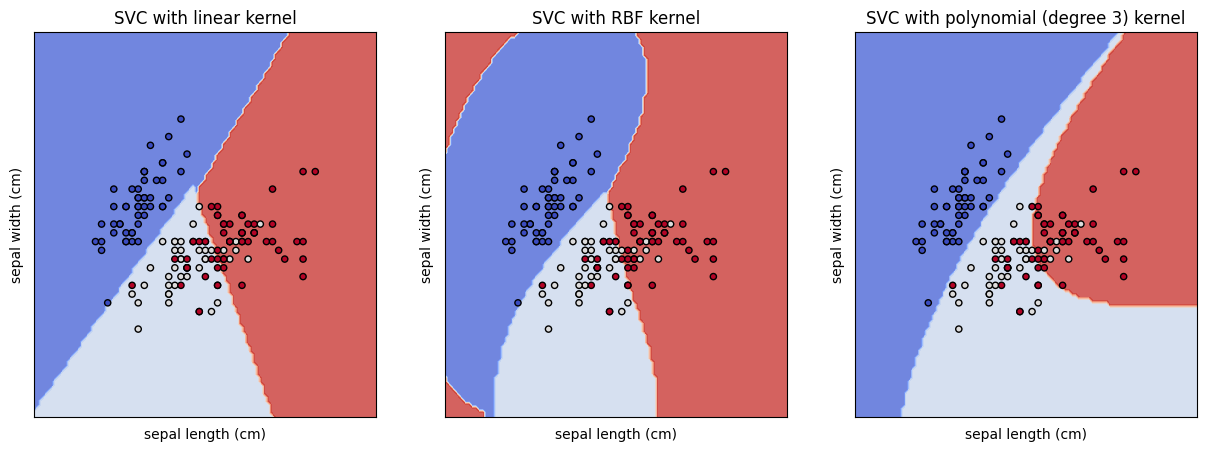

In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Fit all models to the data
models_fitted = (clf.fit(X, y) for clf in models.values())

# Title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 1x3 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize=(15,5))
# plt.subplots_adjust(wspace=0)


X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models_fitted, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Something to try next

Look at the Breast Cancer Wisconsin dataset in scikit-learn ([link to the dataset card](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer))
- What shape does this dataset have?
- Can you apply an SVM to this dataset to classify malicious from benign?
- Can you apply K-nearest neighbourhood instead (this is another supervised learning algorithm, see)?

## Unsupervised learning example

In this example we work on the same dataset as above, but train a classifier in an unsupervised fashion using the K-means clustering model.

In [13]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pileline that scales and fits the model
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KMeans(n_clusters=3))]
)

Let us again divide into training and testing.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Let us fit the KMeans model and calculate the accuracy.

In [55]:
clf.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KMeans(n_clusters=3))])

Note that this is not a supervised method, so calculating accuracy makes less sense than when we looked at the SVM. Instead, we plot the areas that are divided into clusters by the KMeans model and compare it to our labels.

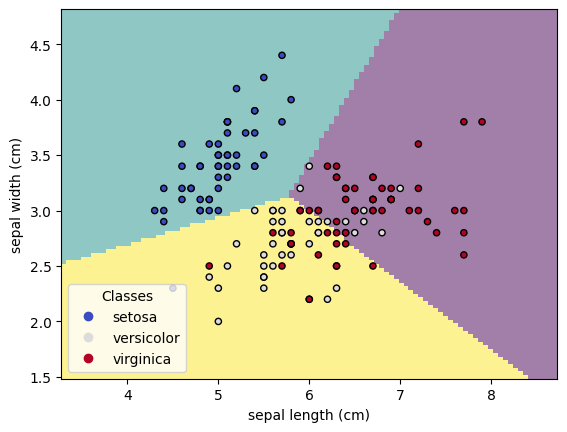

In [56]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]


clf.fit(X_train)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
disp.ax_.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="lower left",
    title="Classes",
)

plt.show()

## Neural Networks

In this example we train a neural network from scratch to detect handwritten digits. We use PyTorch instead of scikit-learn to define our network because it gives us better control over the structure of the network and the training loop. Note that neural networks are really useful in both supervised and unsuperised machine learning regimes. In this example we use a neural network to address a supervised learning problem.

In [57]:
# Import some libraries
import torch
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [58]:
# Download the train-test split of the data
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



What does the data look like?

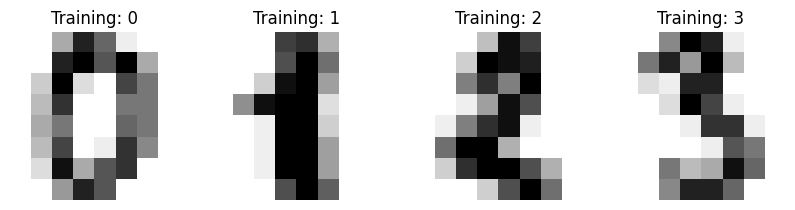

In [69]:
from sklearn import datasets

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Batch both the training and the testing data, for a given batch size.

In [59]:
batch_size = 500

trainset = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

Now that our data is ready, we need to define a network. We define a network with two hidden layers of 64 neurons each.

In [60]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Input Layer (we have 28x28 pixels)
        self.input = nn.Linear(28*28, 16)

        # Hidden layers
        self.hidden1 = nn.Linear(16, 16)
        self.hidden2 = nn.Linear(16, 16)

        # Output layer (we are classifying digits between 0 and 9)
        self.output = nn.Linear(16, 10)

    def forward(self, x):
        # We use ReLu activation function on all layers
        x = F.relu(self.input(x))
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)

        # We apply log softmax to the output
        return F.log_softmax(x, dim=1)

# Define the network
net = Net()

# Print the network we have just defined (note that this network has all the weights and biases randomly initialised)
print(net)

Net(
  (input): Linear(in_features=784, out_features=16, bias=True)
  (hidden1): Linear(in_features=16, out_features=16, bias=True)
  (hidden2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=10, bias=True)
)


Now that we have both the data and the network we want to train it. We use the CrossEntropyLoss (which is the usual loss function for multi-classification problems) and the Adam optimizer with learning rate `0.001`.

In [61]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Then, we go through the running loop, passing through the whole training set multiple times (for the specified number of epochs). Every 100 steps we evaluate on testing to see whether we are overfitting (by printing both the loss on training and testing).

In [65]:
# Set the number of epochs
n_epochs = 10

# To record the loss
losses = []

i = 0
# Loops over the number of epochs
for epoch in range(n_epochs):
    # Loop over the data in batches
    for data in trainset:
        # Upacks features and labels of the data
        X, y = data

        # Set gradients to zero
        net.zero_grad()

        # Passes the data through the network
        output = net(X.view(-1,28*28))

        # Loss calculation
        loss = loss_function(output, y)

        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()
        i+=1

        # Every 100 steps print the loss for each batch: it should go down if it is learning (and record it for plotting)
        if i%100==0:
            print(f'Loss at epoch {epoch} and step {i}: ', loss.item())
            losses.append(loss.item())


Loss at epoch 0 and step 100:  0.3323073983192444
Loss at epoch 1 and step 200:  0.4004277288913727
Loss at epoch 2 and step 300:  0.31792908906936646
Loss at epoch 3 and step 400:  0.3205946981906891
Loss at epoch 4 and step 500:  0.2252173125743866
Loss at epoch 4 and step 600:  0.2872476577758789
Loss at epoch 5 and step 700:  0.21079237759113312
Loss at epoch 6 and step 800:  0.24695266783237457
Loss at epoch 7 and step 900:  0.22486011683940887
Loss at epoch 8 and step 1000:  0.17593708634376526
Loss at epoch 9 and step 1100:  0.21664603054523468
Loss at epoch 9 and step 1200:  0.20534253120422363


We can visualise the change in the loss through training by plotting them (this is called learning curve).

Text(0, 0.5, 'loss')

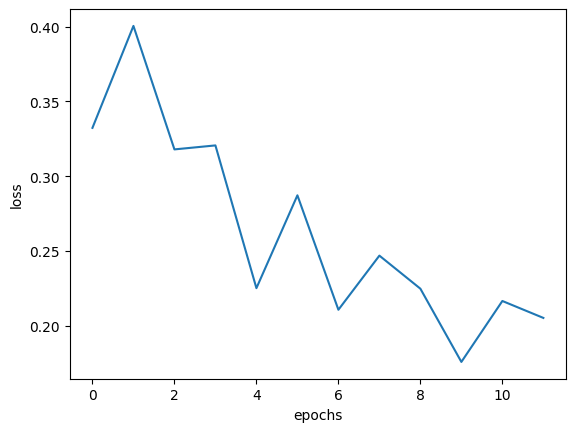

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), losses)
plt.xlabel('epochs')
plt.ylabel('loss')


After training the model, we can compute the accuracy on unseen data (the testing data).

In [70]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.936
